## ASSIGNMENT 3

## Linear models for classification problems

Classification — The act of dividing an input space into a collection of labelled regions using decision boundaries. 

Linear Approach — Use of a straight line to partition a dataset. Intuitively this is easiest in terms of both describing the partition (“If it falls on one side of the line class as A, if it falls on the side class as B”) and performing the cut [1]. 

An example of discriminative training of linear classifiers is Logistic Regression [2].

Logistic regression—maximum likelihood estimation of $\vec{\mathbf{w}}$ assuming that the observed training set was generated by a binomial model that depends on the output of the classifier.

This assignment has 2 parts as follows:

**Part 1.** You will implement your own classifier for **Logistic Regression** (50 points) for 2 class classification using the dataset provided for Part 1 (pls. check the shared files). Check the performance of this algorithm with the classification accuracy.

**Part 2.** You will implement your own **Multinomial Logistic Regression** (50 points) classifier for multiclass data. The multinomial logistic regression algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predicting the probability distribution as a multinomial probability distribution to natively support multi-class classification problems [3]. Check the performance of this algorithm with the classification accuracy.

**_Preprocessing the datasets_**:

**Encoding**

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. You can use One-Hot Encoding is available in the scikit-learn Python machine learning library via the OneHotEncoder class[4]. 

**Data standardization [5]**

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. One of the most popular techniques for scaling numerical data prior to modeling is standardization. 

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values ($\mu$) is 0 and the standard deviation ($\sigma$) is 1. A value is standardized as follows:

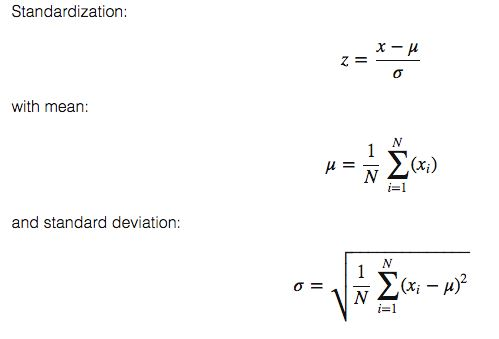

This can be thought of as subtracting the mean value or centering the data.

**Important Remarks:**

You are provided the necessary preprocessing codes as separate notebooks for both datasets that you are going to work with in this assignment. Please check the shared notebooks first before beginning to work with your own algorithms. Note that, in these notebooks, you are also provided with the binary and multinomial logistic regression performances of  of the sklearn library as a baseline for your own implementations. You will be implementing your own solutions that comprise of the necessary training procedures and the codes to train your models for each part before submission.  

**Steps for all parts:**

- Check the data has any null values or not. 
- Check if in the data, some of our columns have numeric values and some of them have categorical values.  To work with categorical variables you need to encode them to prepare this data for the machine learning algorithms.
- Split your data into train and test sets with a ratio of 80:20 with seed=1.
- Apply the data standardization technique to the datasets to standardize the input variables.
- Build your models with your own implemenation (with proper comments and explanations) using the training set.
- Report these classification models according to their accuracy over the test set. Comment on their classification performance.
- Finally, plot confusion matrices for your models over the test set, and comment on the outcomes.



[1]: https://towardsdatascience.com/classification-a-linear-approach-part-1-b080c13992dd

[2]: https://en.wikipedia.org/wiki/Linear_classifier

[3]: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

[4]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

[5]: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [1]:
'''Kayla Akyüz 21726914'''

# Checking if packages are installed
'''
%pip install numpy > null 
%pip install pandas > null
%pip install matplotlib > null
%pip install sklearn > null
%pip install seaborn > null
'''

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Only used for comparasion

# Loading and preprocessing
data = pd.read_csv('Part1_Invistico_Airline.csv')
data.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,360,4,4,4,4,...,5,5,5,5,3,5,3,0,0.0,satisfied
1,Male,Loyal Customer,13,Personal Travel,Eco,2991,1,5,1,4,...,5,4,2,4,3,4,5,0,5.0,dissatisfied
2,Female,Loyal Customer,58,Business travel,Business,1903,3,3,3,3,...,3,3,3,3,1,3,4,0,0.0,dissatisfied
3,Female,disloyal Customer,27,Business travel,Business,2813,4,4,4,3,...,3,2,4,3,2,4,3,0,0.0,dissatisfied
4,Female,Loyal Customer,34,Business travel,Business,2864,3,5,4,4,...,1,1,1,3,4,1,1,21,19.0,dissatisfied


First look at our data makes us realize it seems to be about flight passengers with various values and not all of them are numeric. Before we process this data we will need to numericizee those values. Lets start preprocessing the data with first checking the null values.

In [2]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             313
satisfaction                           0
dtype: int64

313 values seems to be null for 313 'Arrival Delay in Minutes' data column. Lets fix that with the method of equaling null values with the median of the data.

In [3]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Now that we got rid of the null values we can continue with converting non-numeric values to numeric ones.

In [4]:
def object_cols(df):
    return list(df.select_dtypes(include='object').columns)

def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)

obj_col = object_cols(data)
num_col = numerical_cols(data)

le = LabelEncoder()
norm = Normalizer()

for col in obj_col:
    data[col] = le.fit_transform(data[col])
    
data[num_col] = norm.fit_transform(data[num_col])

data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0.177518,1,1,0.983177,0.010924,0.010924,0.010924,0.010924,...,0.013655,0.013655,0.013655,0.013655,0.008193,0.013655,0.008193,0.000000,0.000000,1
1,1,0,0.004346,1,1,0.999978,0.000334,0.001672,0.000334,0.001337,...,0.001672,0.001337,0.000669,0.001337,0.001003,0.001337,0.001672,0.000000,0.001672,0
2,0,0,0.030463,0,0,0.999514,0.001576,0.001576,0.001576,0.001576,...,0.001576,0.001576,0.001576,0.001576,0.000525,0.001576,0.002101,0.000000,0.000000,0
3,0,1,0.009598,0,0,0.999944,0.001422,0.001422,0.001422,0.001066,...,0.001066,0.000711,0.001422,0.001066,0.000711,0.001422,0.001066,0.000000,0.000000,0
4,0,0,0.011870,0,0,0.999873,0.001047,0.001746,0.001396,0.001396,...,0.000349,0.000349,0.000349,0.001047,0.001396,0.000349,0.000349,0.007331,0.006633,0


Using the LabelEncoder and Normalize method of sklearn we converted our non-numeric data columns. Now that this step is done we can move to third step which is splitting data in to train and test data with a ratio of 80:20 with seed 1. In this logistic regression training we want to predict the satisfaction of the customer given the rest of the data so we use satisfaction as Y parameter.

In [5]:
X_data = data.drop(['satisfaction'], axis = 1)
y_data = data['satisfaction']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.20, random_state=1)

Now we have done preprocessing our data. Up until now everything was same as the given example since using sklearn was allowed during preprocessing. Now below is my implementation of logistic regression.

In [38]:
# Logistic Regression
class KaylaLogisticRegression:
    def __init__(self, iterNum=10000, learnRate = 0.01):
        self.iterNum = iterNum
        self.learnRate = learnRate
        
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1]) # Initializing weights array with zeros

        for i in range(self.iterNum): # Iterating as much as set number
            self.theta -= self.learnRate * self.gradient(X, y) # Getting gradient and multiplying with learn rate and updating the theta
        
        # At the end doing a loss calculation for final weights
        predictionFinal = self.sigmoid(np.dot(X, self.theta))
        self.loss =  (-y * np.log(predictionFinal) - (1 - y) * np.log(1 - predictionFinal)).mean()
    
    def gradient(self, X, y):
        hypothesis = np.dot(X, self.theta) # Getting hypothesis by multiplying X with current weights, theta
        prediction = self.sigmoid(hypothesis) # Making a prediction by using sigmoid
        error = prediction - y # Calculating error by substracting prediction with actual value
        return np.dot(X.T, error) / y.size # Returning results by calculating the gradient descent
    
    def score(self, X, y): # Gets the accuracy of a prediction
        predictions = self.predict(X) # Making prediction
        return (predictions == y).sum() / len(y) # Calculating rate of accuracy
    
    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.theta)) # Prediction probablities of given X
    
    def predict(self, X):
        return self.predict_prob(X) >= 0.5 # Prediction result of given X is if probablity greater than threshold which is 0.5
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) # Sigmoid function

Now that we have implementation of Logistic Regression lets train it and compare results with sklearn's Logistic Regression

In [39]:
sklearn_log_reg = LogisticRegression(max_iter = 10000)
kayla_log_reg = KaylaLogisticRegression(iterNum=10000, learnRate = 0.01)

sklearn_log_reg.fit(X_train, y_train)
kayla_log_reg.fit(X_train, y_train)

In [40]:
sklearn_score = sklearn_log_reg.score(X_test, y_test)
kayla_score = kayla_log_reg.score(X_test, y_test)

In [41]:
print("Implemented Logistic Regression Score: ", kayla_score)
print("Sklearn Logistic Regression Score: ", sklearn_score)


Implemented Logistic Regression Score:  0.7474616235984793
Sklearn Logistic Regression Score:  0.7515037774890525


We can see the implemented one is a little short of sklearn one, lets test with different parameters

In [42]:
kayla_log_reg_1 = KaylaLogisticRegression(iterNum=1000, learnRate = 0.01)
kayla_log_reg_1.fit(X_train, y_train)
kayla_log_reg_2 = KaylaLogisticRegression(iterNum=100000, learnRate = 0.01) # This one takes an hour result is 0.7465473268851355, if you are rerunning kernel and stuck here skip these, the commentry is below.
kayla_log_reg_2.fit(X_train, y_train)
kayla_log_reg_3 = KaylaLogisticRegression(iterNum=10000, learnRate = 0.1)
kayla_log_reg_3.fit(X_train, y_train)
kayla_log_reg_4 = KaylaLogisticRegression(iterNum=10000, learnRate = 0.001)
kayla_log_reg_4.fit(X_train, y_train)

In [43]:
kayla_score_1 = kayla_log_reg_1.score(X_test, y_test)
kayla_score_2 = kayla_log_reg_2.score(X_test, y_test)
kayla_score_3 = kayla_log_reg_3.score(X_test, y_test)
kayla_score_4 = kayla_log_reg_4.score(X_test, y_test)

In [44]:
print("Implemented Logistic Regression Score iter 1000, learning rate 0.01: ", kayla_score_1)
print("Implemented Logistic Regression Score iter 100000, learning rate 0.01: ", kayla_score_2)
print("Implemented Logistic Regression Score iter 10000, learning rate 0.1: ", kayla_score_3)
print("Implemented Logistic Regression Score iter 10000, learning rate 0.001: ", kayla_score_4)

Implemented Logistic Regression Score iter 1000, learning rate 0.01:  0.7388961070208363
Implemented Logistic Regression Score iter 100000, learning rate 0.01:  0.7465473268851355
Implemented Logistic Regression Score iter 10000, learning rate 0.1:  0.7465473268851355
Implemented Logistic Regression Score iter 10000, learning rate 0.001:  0.7388961070208363


Therefore we can conclude iter 10000 and learning rate 0.01 seems a good choice. Below is the confusion matrix for part 1:

<AxesSubplot:>

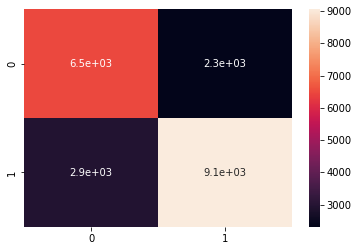

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

prediction = kayla_log_reg.predict(X_test)
cfMatrix = confusion_matrix(prediction, y_test)
sns.heatmap(cfMatrix, annot=True)

<AxesSubplot:>

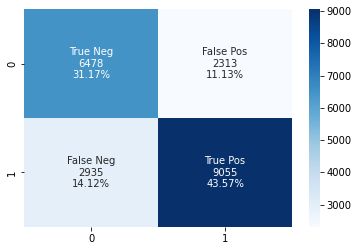

In [55]:
groupNames = ["True Neg","False Pos","False Neg","True Pos"]
groupCounts = ["{0:0.0f}".format(value) for value in
                cfMatrix.flatten()]
groupPercentages = ["{0:.2%}".format(value) for value in
                     cfMatrix.flatten()/np.sum(cfMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(groupNames,groupCounts,groupPercentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfMatrix, annot=labels, fmt='', cmap='Blues')

Here we can observe that false negative of the model is greater than false positive. The model performs at average.

And this concludes part 1. Starting part 2 below:

In [687]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
from pandas import DataFrame
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.preprocessing import (FunctionTransformer, StandardScaler, OneHotEncoder) # preprocessing 
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from collections import Counter
import warnings
# load models
from sklearn.linear_model import LogisticRegression # Used only for comparasion
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [688]:
df = pd.read_csv('Part2_glass.csv')
features = df.columns[:-1].tolist()
df.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00,2
1,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
2,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2
3,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17,2
4,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00,2
5,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17,2
6,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.00,0.12,2
7,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
8,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.00,0.00,1
9,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1


We can see the data is already numeric, so we check for null values and normalize the values.

In [689]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,1.518483,13.386023,2.795322,1.417836,72.595088,0.500468,8.942164,0.173450,0.060468,2.649123
std,0.003061,0.762327,1.380812,0.477435,0.768149,0.560228,1.417021,0.515266,0.100889,2.033466
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516540,12.895000,2.400000,1.190000,72.255000,0.165000,8.225000,0.000000,0.000000,1.000000
50%,1.517780,13.300000,3.490000,1.350000,72.750000,0.560000,8.590000,0.000000,0.000000,2.000000
75%,1.519300,13.785000,3.610000,1.595000,73.025000,0.610000,9.235000,0.000000,0.100000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.510000,7.000000


In [690]:
df['Type'].value_counts()

2    62
1    59
7    21
3    14
5     9
6     6
Name: Type, dtype: int64

We can confirm that the data is unbalanced and means are not at the same scale.

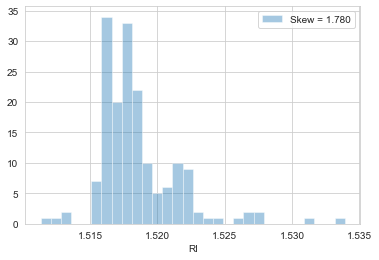

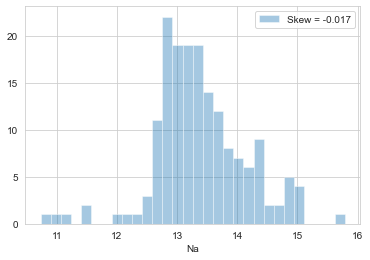

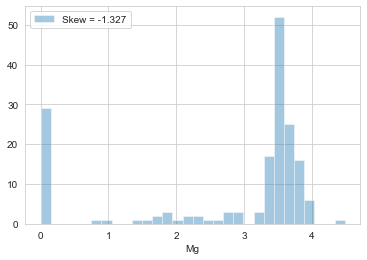

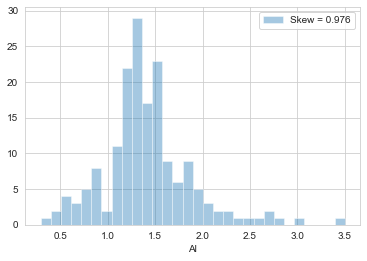

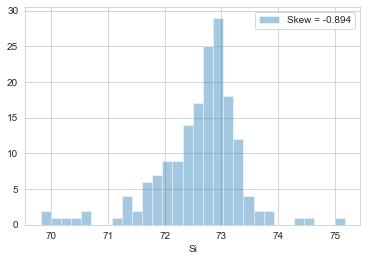

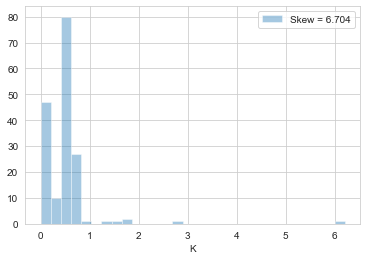

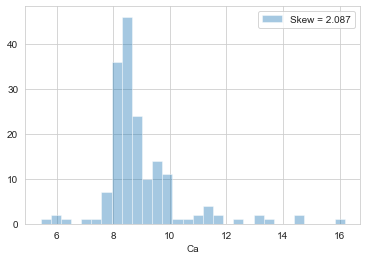

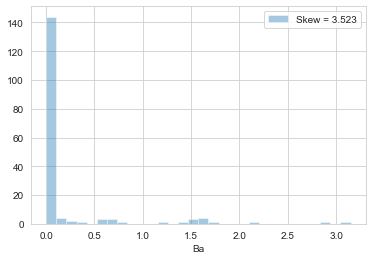

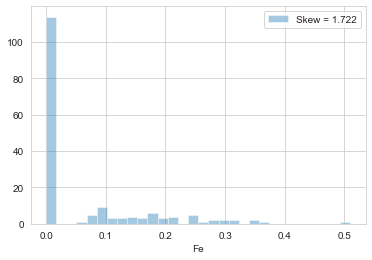

In [691]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Variables are not normaly distrubuted.

In [692]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))   

The dataset contains 23 observations with more than 2 outliers


Since these outliers can harm our model training process we need to get rid of them.

<Figure size 576x576 with 0 Axes>

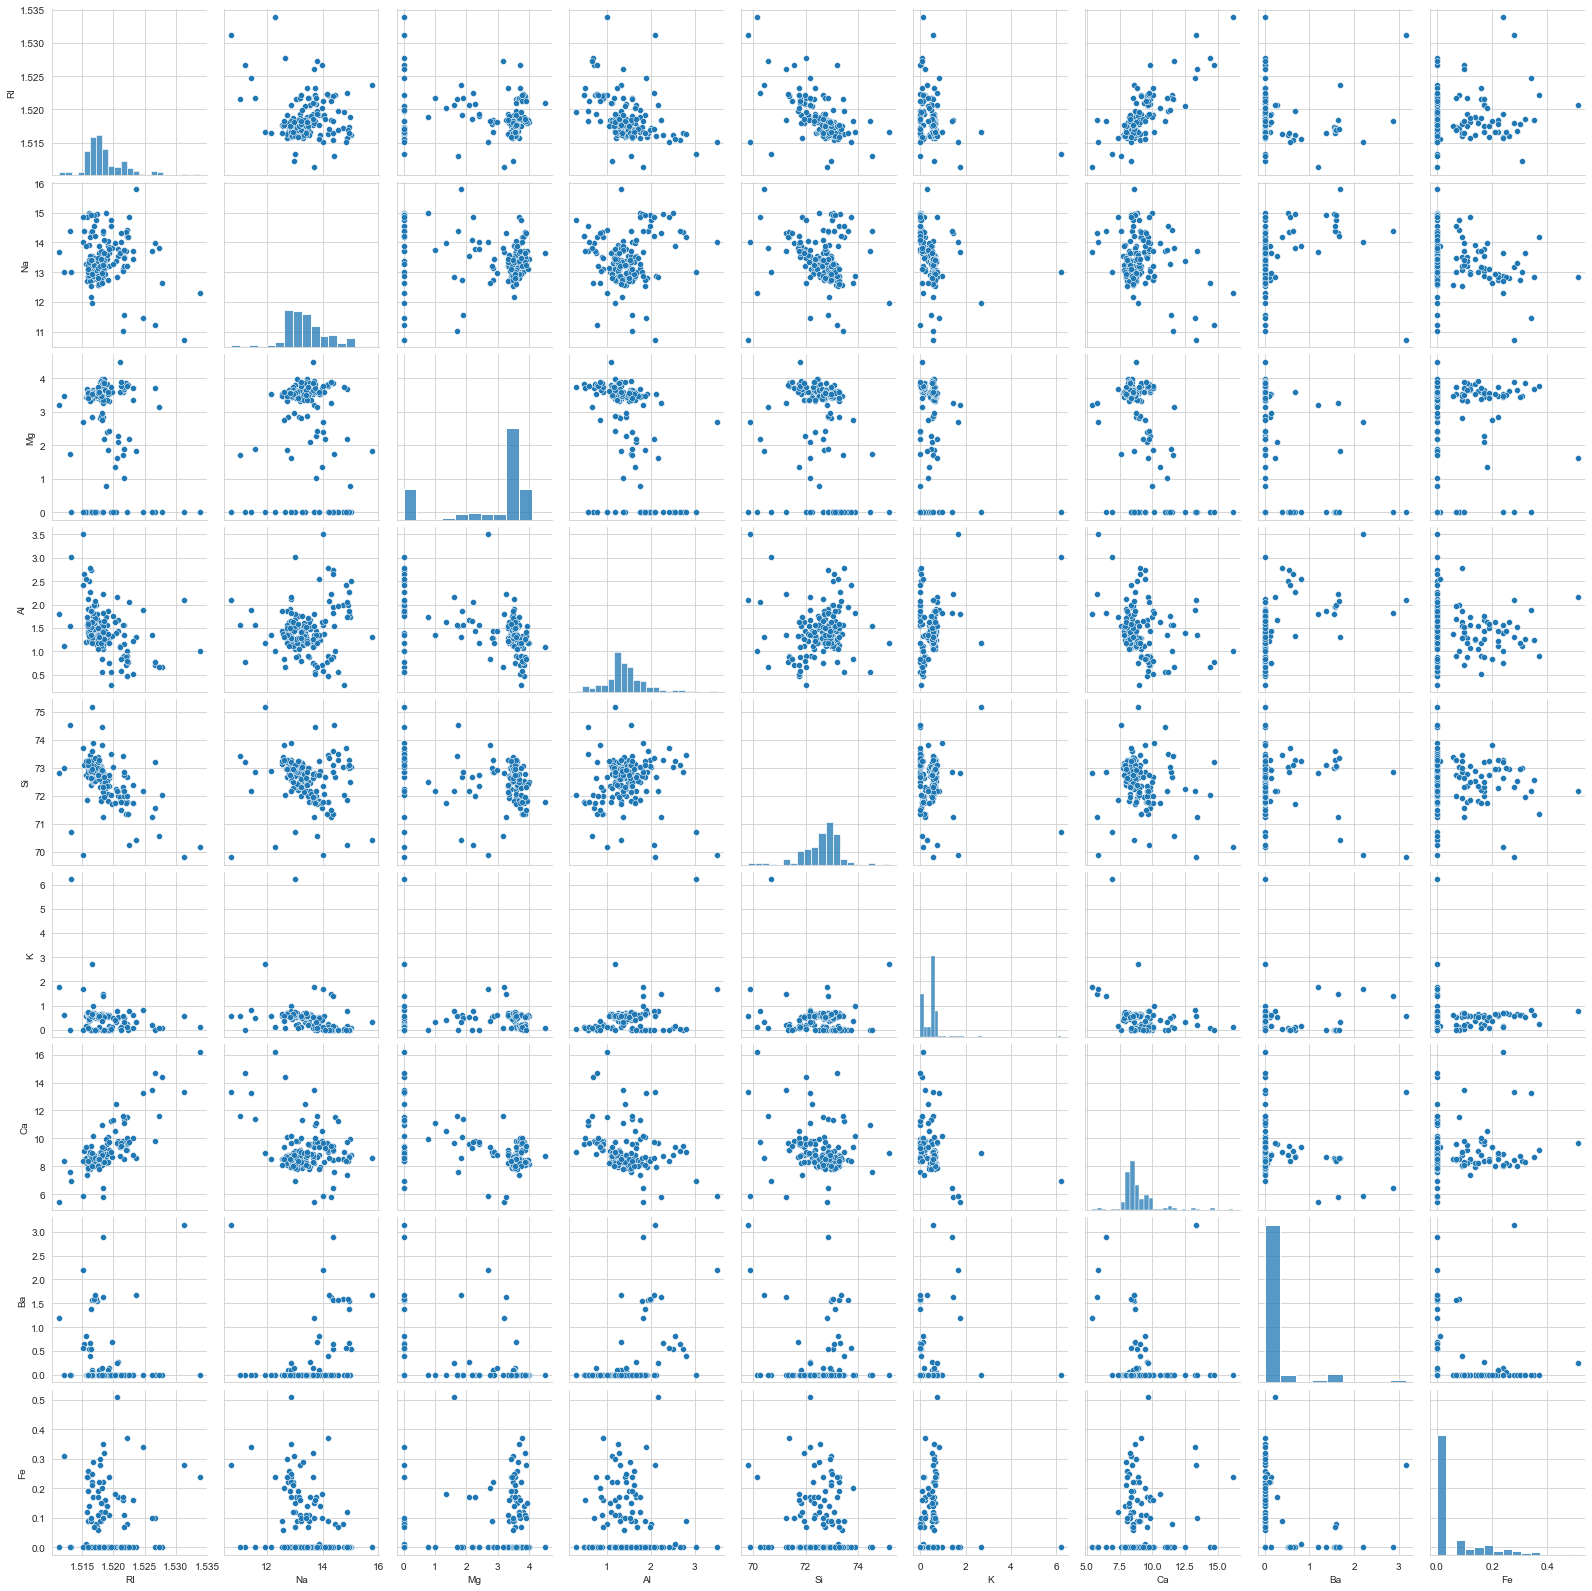

In [693]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

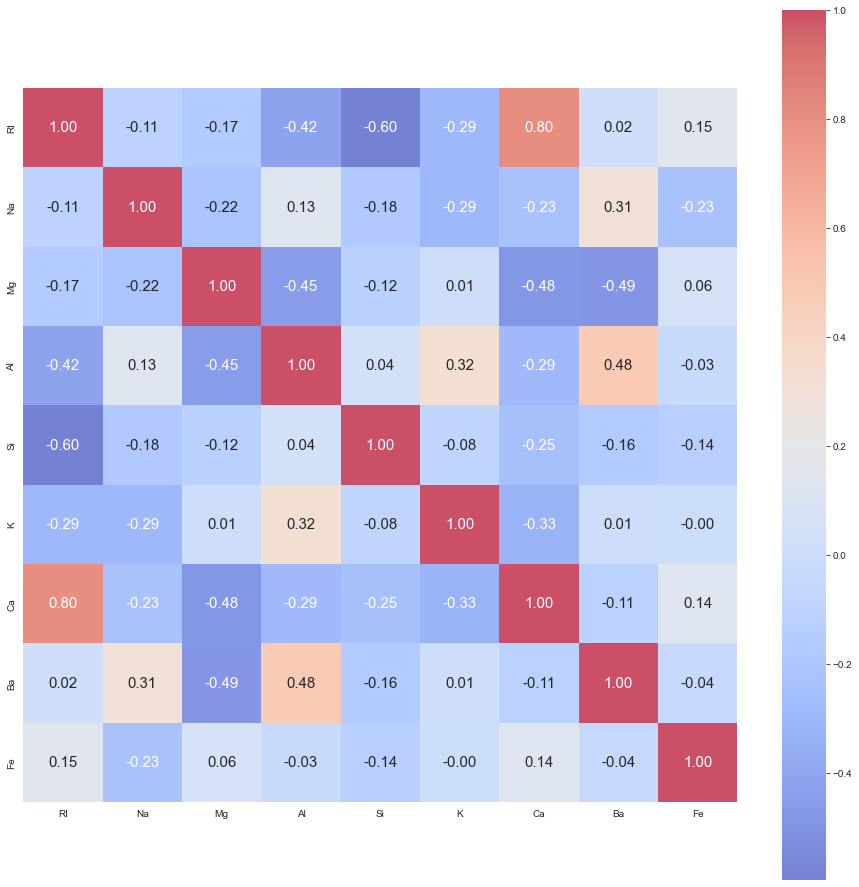

In [694]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

There seems to be a strong positive correlation between RI and Ca.

In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      171 non-null    float64
 1   Na      171 non-null    float64
 2   Mg      171 non-null    float64
 3   Al      171 non-null    float64
 4   Si      171 non-null    float64
 5   K       171 non-null    float64
 6   Ca      171 non-null    float64
 7   Ba      171 non-null    float64
 8   Fe      171 non-null    float64
 9   Type    171 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 13.5 KB


There seems to be no null values in dataset. Lets remove the outliers

In [696]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(148, 10)


After removing outliers lets check back on the distrubutions.

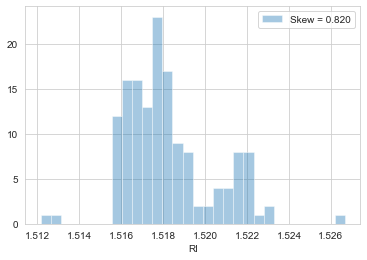

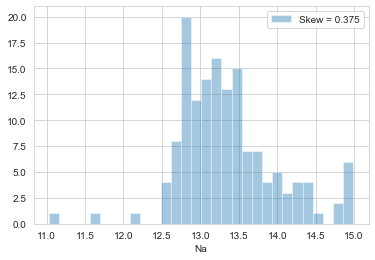

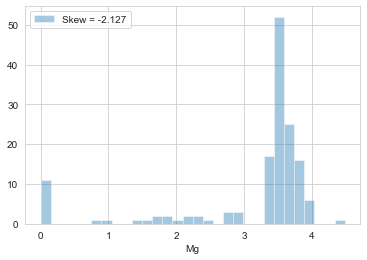

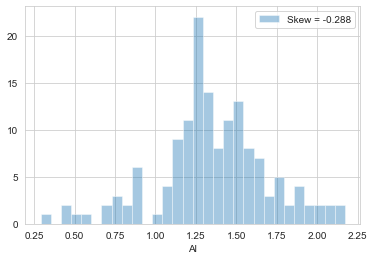

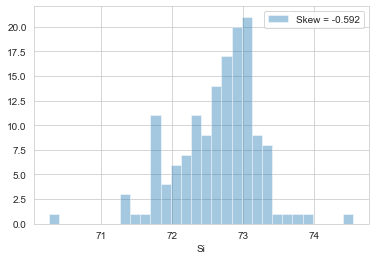

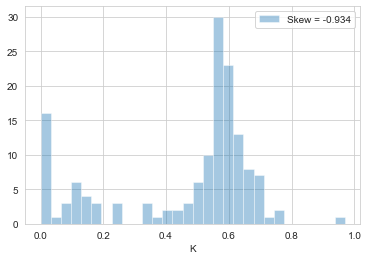

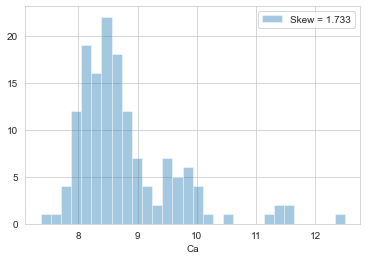

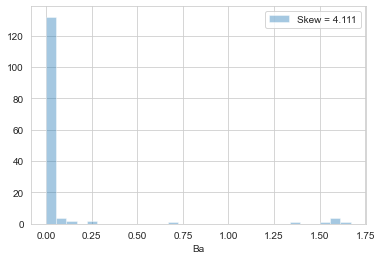

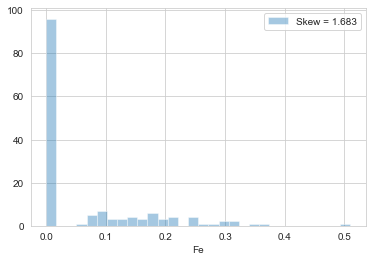

In [697]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

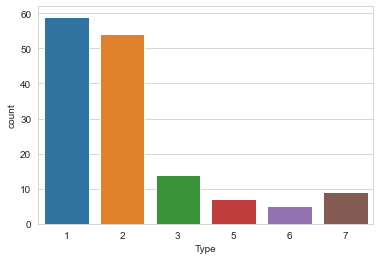

In [698]:
sns.countplot(df['Type'])
plt.show()

Lets scale our data.

                  0             1             2             3             4  \
count  1.480000e+02  1.480000e+02  1.480000e+02  1.480000e+02  1.480000e+02   
mean   4.055615e-14  2.304463e-15  1.920386e-16 -8.401688e-17 -1.878377e-15   
std    1.003396e+00  1.003396e+00  1.003396e+00  1.003396e+00  1.003396e+00   
min   -2.831939e+00 -3.670071e+00 -2.968280e+00 -3.138477e+00 -4.195919e+00   
25%   -7.313176e-01 -7.184010e-01  2.208229e-01 -4.786491e-01 -5.473560e-01   
50%   -2.151916e-01 -1.612584e-01  3.652441e-01 -5.012137e-02  1.841193e-01   
75%    4.092859e-01  4.591060e-01  4.812545e-01  5.631166e-01  6.512059e-01   
max    3.934788e+00  2.588892e+00  1.283857e+00  2.417607e+00  3.365596e+00   

                  5             6             7             8  
count  1.480000e+02  1.480000e+02  1.480000e+02  1.480000e+02  
mean   1.200241e-16 -1.956393e-15 -1.200241e-17  6.601326e-17  
std    1.003396e+00  1.003396e+00  1.003396e+00  1.003396e+00  
min   -1.983278e+00 -1.683817e+0

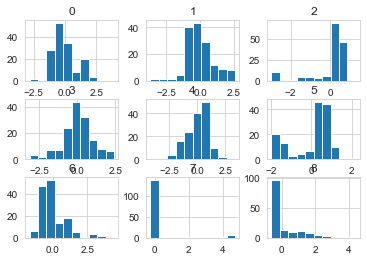

In [699]:
# Define X as features and y as lablels
X = df[features] 
y = df['Type'] 

# perform a robust scaler transform of the dataset
trans = StandardScaler()
X = trans.fit_transform(X)
# convert the array back to a dataframe
X_standard = DataFrame(X)
# summarize
print(X_standard.describe())
# histograms of the variables
X_standard.hist()
plt.show()


After scaling we can now split the data for our process.

In [870]:
seed = 1 # Seed set to 1 as requested
test_size = 0.2 # Test ratio is 80:20

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = test_size , random_state = seed) # Splitting data

Now that preprocessing ends, we can start implementing the Multinomial Logistic Regression algorithm and then compare results with the sklearn library.

In [1053]:
# Multinomial Logistic Regression
class KaylaMultinomialLogisticRegression:
    def __init__(self, iterNum=4200, learnRate = 0.01): # Setting given max iter number and learn rate or defaults
        self.iterNum = iterNum
        self.learnRate = learnRate
        
    def fit(self, X, y):
        classAmount = len(pd.unique(y)) # Basically getting class amount by calculating how many different values of y there are, in our case it results 6
        # print(classAmount) # One thing to note here, doing this conversion eases the calculations however at the end the predections need to be converted back or
        # if there is a comparasion with given y values the y values also need to be scaled to 0-5. This is due that there is no type 4 glass in the given dataset.

        X = X.values.T # Converting the X by getting values and tranposing for easier calculation
        
        # Lets initialize the weights and bias
        
        # weight = np.zeros((classAmount, X.shape[0])) # This method is not used since it is better to initialize with random values
        np.random.seed(4) # Some seeds might be good or some might be bad however since we are training enough it wont matter unless the learn rate and iter is too low

        weight = np.random.randn(classAmount, X.shape[0])*0.1 # A random vector of (classAmount, featureAmount) shape.
        bias = np.zeros(classAmount) # and bias is set to 0, with classAmount sized array
        
        # We must also one hot encode the given y values, converting them in to an array shaped with class amount
        y = y.values.reshape(-1, 1) # Just reshaping to convert row-column order
        yRaw = y.copy()
        y = self.oneHotEncode(y) # One hot encoding the y values.

        for i in range(self.iterNum): # Iterating as iter number
            
            gradients = self.getGradForBackProp(X, y, weight, bias) # Getting the gradient
           

            dw = gradients["dw"] # Getting the weight derivation from the gradient
            db = gradients["db"] # Getting bias from the gradient

            weight = weight - self.learnRate * dw.T # Calculating new weights by substracting old with current gradient derivation scaled by learn rate
            bias = bias - self.learnRate * db # Also calculating new bias with substracting scaled bias derivative

        self.params = {"weight": weight, "bias": bias} # Setting self parameters at the final result to save
        
        self.cost = np.squeeze(self.crossEntropyLoss(X, yRaw)) # At the final recording the final cost, even tho this is never used
    
    def getGradForBackProp(self, X, y, w, b): # Geting gradient by forward and backward propagation
        
        # First calculating forward propagation from X to cost
        m = X.shape[1] # Getting the M value from shape of X
        A = self.softmax(np.dot(w, X).T + b.T) # Making a probablity prediction
        
        dz = A - y # Then doing backward propagation in order to find gradient, in this step we substract the prediction with actual value
        dw = (1/m)*dz.T.dot(X.T) # Getting gradient of loss with respect to weight by dividing the dot product of difference with X transpose and dividing with m
        db = (1/m)*np.sum(dz, axis = 0) # Getting gradient of loss with respect to bias

        dw = dw.T # Transposing the weights matrix
        
        grads = {"dw": dw,
                 "db": db} # Creating a dictionary with weight and bias which will be used in next steps as well as final predictions of the model

        return grads # returning the dictionary
        
    def crossEntropyLoss(self, X, y): # Formula for calculating the loss of multiclass data, used non-vector form
        Apred = self.predict_prob(X).T # Computing the weight A plus bias with linear transformation
        return -(1.0/(len(y)*X.shape[0])) * np.sum(y.T*np.log(Apred) + (1-y).T*np.log(1-Apred))
        #-(1.0/X.shape[1]) * (np.dot(np.log(vector), y) + np.dot(np.log(1-vector), (1-y)))
    
    def score(self, X, y): # Gets the accuracy of a prediction
        leng = len(y) # Recording the length of the test set
        
        # Steps below are to convert 1-7 (no4) y set to 0-5 y set which is default return value of self.predict,
        # however self.predictAndConverTo_1_7 can return correct result regardless
        y = y.values.reshape(-1, 1) # Reshaping the y set
        y = self.oneHotEncode(y) # One hot encoding
        y = np.argmax(y, axis = 1) # Basically getting which bit is 1 in onehot encoding meaning we just converted 1-7(no4) set to 0-5 set
        score = 0 # Score is initalized as 0
        X = X.values # X converted from pandas to numpy for easier calculation
    
        for ind in range(leng): # Iterating for all values in test set
            if(self.predict(X[ind]) == y[ind]): # Predicting the value, keep in mind this will result in 0-5 set not the acutal glass type, so comparing it with the converted y result
                score += 1 # If we predicted correctly increasing the score

        return score / leng # Calculating rate of accuracy by dividing the score with the length so we get percentage result
    
    def predict_prob(self, X):
        return self.softmax(np.dot(self.params["weight"], X).T + self.params["bias"].T) # Uses softmax algorithm to predict probablities
    
    def predict(self, X):
        return np.argmax(self.predict_prob(X)) # Gets the highest probablity class, keep in mind this function returns 0-5 set
    
    def predictAndConverTo_1_7(self, X): # The actual predict class is here, however this is not flexable as it is fitted for part 2
        # Our dataset consist of 1-7 types of glass with no 4 type. In order to train better model I converted the type values to 0-5 set
        # Because of that the above prediction methods result in 0-5 class number, in this one we replace the numbers with according glass type
        # however ofcourse in a different data this method is useless, however my model would still work and return result with N classes

        X = X.values # Converting pandas to numpy
        tempArray = [] # The temporary result array
        leng = X.shape[0] # Getting amount of test subject
        for ind in range(leng): # Iterating on the test subject
            tempArray.append(self.predict(X[ind])) # Getting the prediction result of the test subject and appending it
        # Below is the hardcoded one, since we get class 5 which is glass type 7 and class 4 which is glass type 6 etc.
        # And there is no glass type 4 so class 2 equals glass type 3 instead
        # And lastly class 0 is glass type 1
        tempArray = np.array(tempArray)
        tempArray[tempArray == 5] = 7
        tempArray[tempArray == 4] = 6
        tempArray[tempArray == 3] = 5
        tempArray[tempArray == 2] = 3
        tempArray[tempArray == 1] = 2
        tempArray[tempArray == 0] = 1
        # After changing class types with glass types :) we return the result.
        return tempArray

    def oneHotEncode(self, array): # Hot encoding the given array
        oneHotVector = OneHotEncoder() # Using the preprocessing class OneHotEncoder
        oneHotVector.fit(array) # Fitting the given array
        return oneHotVector.transform(array).toarray() # Transforming and returning as numpy array
        
    def softmax(self, z): # Softmax function which is equvelent of sigmoid in one class logistic regression
        zexp = np.exp(z - np.max(z)) # Taking z to the power
        return np.divide(zexp, np.sum(zexp)) # returning the softmax calculated

Now that the Multinominal Logistic Regression Class is constructed moving on to making training and calculating result with sklearn library

In [1054]:
sklearn_mlog_reg = LogisticRegression(multi_class = 'multinomial') # Making sure the sklearn is also using multinominal calculation
kayla_mlog_reg = KaylaMultinomialLogisticRegression(2000, 0.01)

In [1055]:
sklearn_mlog_reg.fit(X_train, y_train)
kayla_mlog_reg.fit(X_train, y_train)

In [1056]:
print(sklearn_mlog_reg.coef_, sklearn_mlog_reg.intercept_)
print(kayla_mlog_reg.params)
sklearn_score = sklearn_mlog_reg.score(X_test, y_test)
kayla_score = kayla_mlog_reg.score(X_test, y_test)
#crossEntropy = kayla_mlog_reg.crossEntropyLossScore(X_test, y_test)


[[ 0.16952841  0.15143997  0.8995211  -0.95778595  0.2733125   0.30910821
  -0.12845074  0.32194735  0.21629372]
 [ 0.11346292  0.18323217 -0.24062794  0.23671084 -0.39816785  0.43712698
  -0.55842848 -0.56588601  0.56853122]
 [-1.3886623  -0.31433713  0.4864878  -1.05547542 -0.66958536 -0.44765197
   0.34771948 -0.06347111 -0.47796344]
 [ 0.16771187 -0.91564432 -0.73413343  1.0766962   0.12096033  0.67773828
   0.84520354  0.04130094  0.59826273]
 [-0.2482277   0.5121067  -0.08027597  0.43115702  0.40412607 -1.3026738
   0.08917558 -0.70633736 -0.58460914]
 [ 1.1861868   0.38320261 -0.33097157  0.26869731  0.26935431  0.3263523
  -0.59521938  0.97244619 -0.32051509]] [ 2.3195243   2.28572166  0.52709837 -2.24409745 -1.75360514 -1.13464174]
{'weight': array([[ 1.89096173, -0.29629351,  3.20954473, -4.78089584, -1.02186092,
        -0.71980176, -0.24213099, -1.62724706, -0.47458882],
       [-1.51147172, -0.47902639,  1.0914757 ,  1.71567197, -0.50852926,
         2.18844087, -1.6752368

Above is the comparasion of the weights, it seems our trained model gets more fit, biasing over the high accurance of type 1 and type 2 glass. Other than that you can see the predictions are accurate below:

In [1057]:
print("Implemented Multinominal Logistic Regression Score: ", kayla_score)
print("Sklearn Multinominal Logistic Regression Score: ", sklearn_score)
print("The final crossentropy cost of the model is: ", kayla_mlog_reg.cost)

Implemented Multinominal Logistic Regression Score:  0.6666666666666666
Sklearn Multinominal Logistic Regression Score:  0.6333333333333333
The final cost of the model is:  63.5115931448579


Comparing the score it seems my implementation is slightly better, this could be due chosen learn rate or iter number or initial weights, even tho I experimented a lot it was not possible to get out of 61-66 range due to low amount of given data. 

We seem to be getting high crossentropy cost, given  the accuracy is 0.66 this cost seems to be normal.

In [1024]:
kayla_mlog_reg_1 = KaylaMultinomialLogisticRegression(2000, 0.1)
kayla_mlog_reg_2 = KaylaMultinomialLogisticRegression(2000, 0.001)
kayla_mlog_reg_3 = KaylaMultinomialLogisticRegression(8000, 0.01)
kayla_mlog_reg_4 = KaylaMultinomialLogisticRegression(1000, 0.01)
kayla_mlog_reg_5 = KaylaMultinomialLogisticRegression(5000, 0.001)

In [1015]:
kayla_mlog_reg_1.fit(X_train, y_train)
kayla_mlog_reg_2.fit(X_train, y_train)
kayla_mlog_reg_3.fit(X_train, y_train)
kayla_mlog_reg_4.fit(X_train, y_train)
kayla_mlog_reg_5.fit(X_train, y_train)

In [1016]:
kayla_score_1 = kayla_mlog_reg_1.score(X_test, y_test)
kayla_score_2 = kayla_mlog_reg_2.score(X_test, y_test)
kayla_score_3 = kayla_mlog_reg_3.score(X_test, y_test)
kayla_score_4 = kayla_mlog_reg_4.score(X_test, y_test)
kayla_score_5 = kayla_mlog_reg_4.score(X_test, y_test)

In [1017]:
print("Implemented Multinominal Logistic Regression Score with 2000 iter 0.1 learn rate: ", kayla_score_1)
print("Implemented Multinominal Logistic Regression Score with 2000 iter 0.001 learn rate: ", kayla_score_2)
print("Implemented Multinominal Logistic Regression Score with 8000 iter 0.01 learn rate: ", kayla_score_3)
print("Implemented Multinominal Logistic Regression Score with 1000 iter 0.01 learn rate: ", kayla_score_4)
print("Implemented Multinominal Logistic Regression Score with 5000 iter 0.001 learn rate: ", kayla_score_5)

Implemented Multinominal Logistic Regression Score with 2000 iter 0.1 learn rate:  0.6666666666666666
Implemented Multinominal Logistic Regression Score with 2000 iter 0.001 learn rate:  0.6333333333333333
Implemented Multinominal Logistic Regression Score with 8000 iter 0.01 learn rate:  0.6666666666666666
Implemented Multinominal Logistic Regression Score with 1000 iter 0.01 learn rate:  0.6666666666666666
Implemented Multinominal Logistic Regression Score with 5000 iter 0.001 learn rate:  0.6666666666666666


As you can see at avarage we get 0.6 mark. The second one is lower accuracy because in the code the weights are initialized with random values, when the learn rate and iteration is low the random initialized values have heavier effect.

Below is the confussion matrix of part 2

<AxesSubplot:>

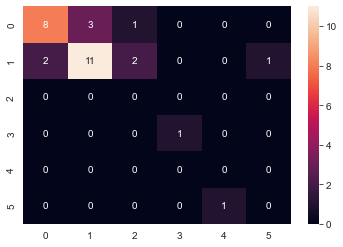

In [978]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

prediction = kayla_mlog_reg.predictAndConverTo_1_7(X_test) # Making predictions with special method so results are actual glass type instead of class type
cfMatrix = confusion_matrix(prediction, y_test) # Creating confusion matrix
sns.heatmap(cfMatrix, annot=True) # Printing the basic result

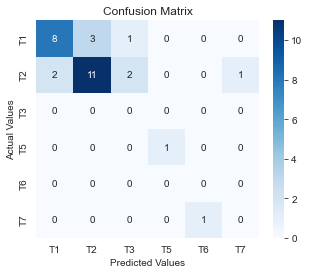

In [977]:
cm = confusion_matrix(prediction, y_test) # Creating confusion matrix with predictiopn and test data

cm_df = pd.DataFrame(cm,
                     index = ['T1','T2','T3','T5','T6','T7'], 
                     columns = ['T1','T2','T3', 'T5','T6','T7']) # There is no type 4 glass
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap='Blues') # Styling the heatmap
plt.title('Confusion Matrix') # Adding labels
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show() # Showing plot


Here we can see the model is fit to identify Type 1 and Type 2 Glasses but since there is not enough data for other types it might make mistakes, homever accuracy seems to be good. 

19 test subjects of type 1-2 glasses were identified correctly and 1 type 5 glass was also identified correctly. 

There seems to be a confusion with type 7 as it has both false negative and false positive and to correct identifications.

Also it seems there was no type 6 glass at test dataset, however there is 1 false positive type 6 glass. Same for type 3 where there is no test subject but there are some false positives.

Overall model looks decents given limited train data.

And this concludes part 2, I have done all requirements and implemented algorithms with comments, you can check comments for details.

----------------------------------------------

-Kayla Akyüz- -21726914- -BBM409 Assignment 3-

----------------------------------------------